# EMAIL SPAM CLASSIFICATION USING LOGISTIC REGRESSION , CNN ,NAIVE BAYES 

Application :Email is spam or not

Ajay Kumar Gauatam||204102323||IITG||SPML||

In [1]:
#Importing the Library 
import numpy as np 
import pandas as pd
import string 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. LOGISTIC REGRESSION

In [4]:
# Reading the dataset 
df = pd.read_csv('C:/data/spam.csv',encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()

In [10]:
# Removing Punctuation from dataframe
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass 
    return x
df_copy = df_copy.apply(remove_punctuation)
df_copy

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: email, Length: 5572, dtype: object

In [11]:
vectorizer = TfidfVectorizer("english")
email_mat = vectorizer.fit_transform(df_copy)
email_train, email_test, spam_nospam_train, spam_nospam_test = train_test_split(email_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.25, random_state=50)
Email_Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Email_Spam_model.fit(email_train, spam_nospam_train)
pred = Email_Spam_model.predict(email_test)
print('Accuracy is:',accuracy_score(spam_nospam_test,pred))

Accuracy is: 0.9597989949748744


C:\Users\ajayg\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# 2.CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
df = pd.read_csv('C:/data/spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()

In [15]:
df['Spam/Not_Spam'] = df['Spam/Not_Spam'].map({'ham' : 0, 'spam' : 1})
y = df['Spam/Not_Spam'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['email'], y, test_size = 0.3)

In [17]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(X_train)
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

In [18]:
l = len(tokenizer.word_index)
print(f'{l} number of tokens found')

7326 number of tokens found


In [19]:
train_seq = pad_sequences(train_seq)
test_seq = pad_sequences(test_seq, maxlen = train_seq.shape[1])

In [20]:
i_p = Input(shape = (train_seq.shape[1],))
o_p = Embedding(l+1, 25)(i_p)
o_p = Conv1D(32, 3, activation = 'relu')(o_p)
o_p = MaxPooling1D(3)(o_p)
o_p = Conv1D(64, 3, activation = 'relu')(o_p)
o_p = MaxPooling1D(3)(o_p)
o_p = Conv1D(128, 3, activation = 'relu')(o_p)
o_p = GlobalMaxPooling1D()(o_p)
o_p = Dense(1, activation = 'sigmoid')(o_p)

model = Model(i_p,o_p)

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
r = model.fit(train_seq , y_train, validation_data = (test_seq , y_test), epochs = 10)

Epoch 1/10
122/122 [==============================] - 2s 11ms/step - loss: 0.3638 - accuracy: 0.8646 - val_loss: 0.2526 - val_accuracy: 0.8678
Epoch 2/10
122/122 [==============================] - 1s 10ms/step - loss: 0.1127 - accuracy: 0.9528 - val_loss: 0.0740 - val_accuracy: 0.9850
Epoch 3/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0969 - val_accuracy: 0.9839
Epoch 4/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.1037 - val_accuracy: 0.9839
Epoch 5/10
122/122 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0895 - val_accuracy: 0.9868
Epoch 6/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0888 - val_accuracy: 0.9862
Epoch 7/10
122/122 [==============================] - 1s 9ms/step - loss: 8.8405e-04 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9856

In [24]:
def history(model, argument):
    plt.plot(model.history[argument], label = argument)
    plt.plot(model.history['val_'+argument], label = 'validation '+argument)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(argument)
    plt.title(argument)

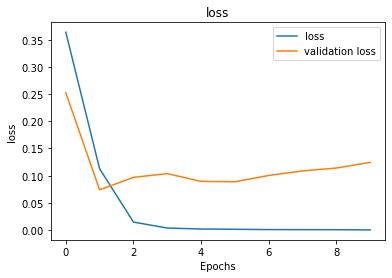

In [25]:
history(r, 'loss')

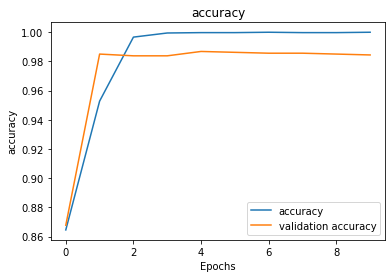

In [27]:
history_plot(r, 'accuracy')

# 3 . NAIVE BAYES CLASSIFIER

In [28]:
from sklearn.naive_bayes import MultinomialNB
df = pd.read_csv('C:/data/spam.csv',encoding = 'ISO-8859-1')
#df.head()
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'Spam/Not_Spam','v2':'email'})
df.groupby('Spam/Not_Spam').describe()
df_copy = df['email'].copy()
#df_copy
# Removing Punctuation from dataframe
def remove_punctuation(x):
    try:
        x = x.str.replace('[^\w\s]','')
    except:
        pass 
    return x
df_copy = df_copy.apply(remove_punctuation)
#df_copy
vectorizer = TfidfVectorizer("english")
email_mat = vectorizer.fit_transform(df_copy)
email_train, email_test, spam_nospam_train, spam_nospam_test = train_test_split(email_mat, 
                                                        df['Spam/Not_Spam'], test_size=0.25, random_state=50)

C:\Users\ajayg\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [29]:
Naive_classifier = MultinomialNB()
Naive_classifier.fit(email_train, spam_nospam_train)
pred = Naive_classifier.predict(email_test)
print('Accuracy is:',accuracy_score(spam_nospam_test,pred))

Accuracy is: 0.9475951184493898
